# Clasificación por arboles de decision

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

# Libreria para árboles de decisión
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Librería para Random Forest
from sklearn.ensemble import RandomForestClassifier

#Regresión Lineal
from sklearn.linear_model import LinearRegression

# Librería de división de datos
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import accuracy_score

# Estado aleatorio para que de lo mismo
np.random.seed(0)

In [2]:
data = pd.read_csv('compras.csv')

In [3]:
print(data.shape)
data.head()

(30, 4)


,vacaciones,descuento,entrega_gratuita,compra
0,no,si,si,si
1,no,si,si,si
2,no,no,no,no
3,si,si,si,si
4,si,si,si,si


In [4]:
#Revisar los valores dentro de cada columna
for columna in data.columns:
    print(data[columna].value_counts())

vacaciones
si    19
no    11
Name: count, dtype: int64
descuento
si    20
no    10
Name: count, dtype: int64
entrega_gratuita
si    23
no     7
Name: count, dtype: int64
compra
si    24
no     6
Name: count, dtype: int64


# Preprocesamiento de datos

In [5]:
data_modelo = pd.get_dummies(data, drop_first = True)

In [6]:
data_modelo.head()

,vacaciones_si,descuento_si,entrega_gratuita_si,compra_si
0,False,True,True,True
1,False,True,True,True
2,False,False,False,False
3,True,True,True,True
4,True,True,True,True


In [7]:
data_modelo.columns = ['vacaciones', 'descuento', 'entrega_gratuita', 'compra']

In [8]:
data_modelo.head()

,vacaciones,descuento,entrega_gratuita,compra
0,False,True,True,True
1,False,True,True,True
2,False,False,False,False
3,True,True,True,True
4,True,True,True,True


# Entrenar modelo

In [9]:
# Columnas entrenamiento
cols_entrenamiento = ['vacaciones', 'descuento', 'entrega_gratuita']

# Columna a predecir
col_predecir = 'compra'

In [10]:
# Separar los datos en una base de entrenamiento y una base de prueba
data_tr, data_te = train_test_split(data_modelo, test_size = 1/3)

In [11]:
data_tr.shape, data_te.shape

((20, 4), (10, 4))

In [15]:
#Definir el modelo
arboles = DecisionTreeClassifier()
#arboles = RandomForestClassifier()
#arboles = LinearRegression()

In [16]:
arboles.fit(data_tr[cols_entrenamiento], data_tr[col_predecir])

DecisionTreeClassifier()

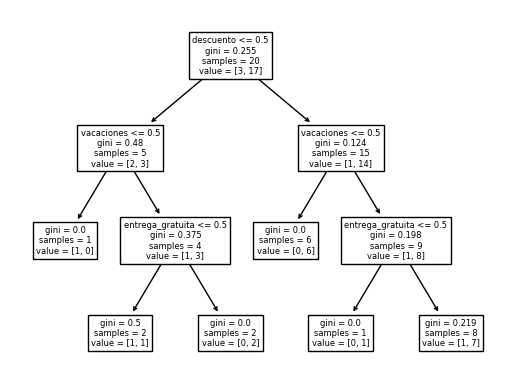

In [17]:
plot_tree(arboles, feature_names=data.columns);

# Validación del modelo

In [18]:
prediccion =  arboles.predict(data_te[cols_entrenamiento])

In [19]:
data_te[cols_entrenamiento]

,vacaciones,descuento,entrega_gratuita
2,False,False,False
28,True,True,True
13,True,True,True
10,True,False,True
26,False,True,True
24,True,False,False
27,False,True,True
11,True,False,False
17,False,True,False
22,True,False,True


In [20]:
prediccion

array([False,  True,  True,  True,  True, False,  True, False,  True,
        True])

In [21]:
# Dato verdadero
np.array(data_te[col_predecir])

array([False,  True,  True,  True,  True, False,  True, False,  True,
        True])

In [22]:
accuracy_score(data_te[col_predecir], prediccion)

1.0